# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 13

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* 75 баллов


<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* 75 баллов






-----

### *Профиль биология*

Набор данных включает 171 молекулу, предназначенную для функциональных доменов белка CRY1, ответственного за формирование циркадного ритма. 56 молекул токсичны, а остальные нетоксичны.

Полученные данные представляют собой полный набор из 1203 молекулярных дескрипторов.

Данное домашнее задание имеет свободную форму, то есть вашей задачей будет для каждого класса моделей получить лучший результат и после выбрать наилучшую модель. Метрика для задачи - `from sklearn.metrics import f1_score`. Работа будет оцениваться по следующим ключевым пунктам:


1.   Предвартельный анализ данных
2.   Предобработка данных
  1.   Обработка пропусков
  2.   Обработка выбросов

3.   Реализация моделей
  1.  Дерево
  2.  Лес
  3.  Логистическая регрессия
  4.  KNN
  5.  MLP



## Предварительный анализ данных

In [41]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import make_scorer, accuracy_score, classification_report, f1_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

Исходя из описания, наша задача будет состоять в классификации молекул на токсичные и нетоксичные на основе их молекулярных дескрипторов. Следовательно, мы будем решать задачу бинарной классификации.

В этом разделе ожидается, что вы посмотрите на распределение признаков и классов, изучите их связь, проанализируете признаки на наличие в них пропусков или выбросов.

In [2]:
df = pd.read_csv('/content/data_bio.csv')

Посмотрим на первые строки этой таблицы:

In [3]:
df.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0,-0.0638,0.0307,0.0,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic


Посмотрим на типы данных в нашей таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 1204 entries, MATS3v to Class
dtypes: float64(1003), int64(200), object(1)
memory usage: 1.6+ MB


Посмотрим на описательные стаистики:

In [5]:
df.describe()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-3,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,-0.031244,0.315789,-0.001001,-0.061501,0.994152,0.677770,-0.025418,-0.053289,1.569251,0.003226,...,23.229975,8.134013,13.490291,0.202529,1.235093,0.011316,1.467836,0.004820,-0.085088,0.061702
std,0.063559,0.762918,0.063928,0.072891,1.108773,1.647322,0.078645,0.109463,2.497362,0.074076,...,6.440623,4.436831,6.229089,0.024356,0.137024,0.005482,1.013361,0.044475,0.029273,0.241896
min,-0.311500,0.000000,-0.184600,-0.348500,0.000000,0.000000,-0.211900,-0.472900,-0.708700,-0.198700,...,0.000000,0.000000,0.000000,0.163600,0.811500,0.001400,0.000000,0.000000,-0.202700,0.000000
25%,-0.066700,0.000000,-0.036000,-0.099550,0.000000,0.000000,-0.066550,-0.118050,0.000000,-0.052350,...,19.249600,5.164700,8.819950,0.182450,1.149750,0.007550,1.000000,0.000000,-0.099500,0.000000
50%,-0.032500,0.000000,-0.002000,-0.059400,1.000000,0.000000,-0.037200,-0.042400,0.000000,-0.001600,...,23.151200,7.848200,13.342700,0.199600,1.238800,0.010700,1.000000,0.000000,-0.082400,0.000000
75%,0.004850,0.000000,0.029000,-0.017100,2.000000,0.000000,0.002650,0.014300,4.897450,0.056550,...,26.958050,10.683950,19.319450,0.219700,1.325350,0.013900,2.000000,0.000000,-0.066350,0.000000
max,0.141100,4.000000,0.218100,0.129000,6.000000,8.141400,0.249500,0.212200,7.740800,0.168400,...,41.380000,20.805400,27.879600,0.272100,1.548800,0.034600,5.000000,0.429200,-0.007300,2.636100


Проверим, имеются ли в нашем данных пропуски. Если да, то удалим их:

In [6]:
df.isnull().sum()

MATS3v             0
nHBint10           0
MATS3s             0
MATS3p             0
nHBDon_Lipinski    0
                  ..
nT5Ring            0
SHdNH              0
ETA_dEpsilon_C     0
MDEO-22            0
Class              0
Length: 1204, dtype: int64

Видно, что таргетная переменная `Class` является категориальной. Заменим `NonToxic` на 0, а `Toxic` на 1:

In [7]:
df['Class_Toxic'] = df['Class'].map({'NonToxic': 0, 'Toxic': 1})
df.drop('Class', axis = 1, inplace = True)
df.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class_Toxic
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,0
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,0
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,0
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,0
4,0.0135,0,0.0424,-0.0353,0,0.0,-0.0638,0.0307,0.0,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,0


Так как наш датасет содержит большое число фичей, то давайте с помощью модели случайного леса отберем 10 наиболее важных и продолжим работать с ними:

In [29]:
features = df.drop('Class_Toxic', axis = 1)
target = df['Class_Toxic']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train, y_train)

feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': rf_classifier.feature_importances_})
feature_importances_10 = feature_importances.sort_values(by = 'Importance', ascending = False)[:10]

print(feature_importances_10['Feature'])

723        ATSC7p
859      SpMax_Dt
98        MDEC-23
62     SpMax3_Bhi
994         ZMIC1
528        ATSC1v
540          MWC2
982          TIC0
332        MATS7p
15     SpMax8_Bhi
Name: Feature, dtype: object


Преобразуем датасет:

In [30]:
#imp_feat = ["ATSC8c", "MATS1e", "minsCH3", "MATS4e", "MATS4s", "ATSC7i", "SpMin4_Bhp", "MLFER_S", "ATSC4p", "SpMax2_Bhm"] # признаки из статьи
imp_feat = ['ATSC7p', 'SpMax_Dt', 'MDEC-23', 'SpMax3_Bhi', 'ZMIC1', 'ATSC1v', 'MWC2', 'TIC0', 'MATS7p', 'SpMax8_Bhi']
data = df[imp_feat]
data['Class_Toxic'] = df['Class_Toxic']
data

,ATSC7p,SpMax_Dt,MDEC-23,SpMax3_Bhi,ZMIC1,ATSC1v,MWC2,TIC0,MATS7p,SpMax8_Bhi,Class_Toxic
0,1.0601,1722.0076,60.1757,4.0792,111.8885,70.0473,5.7137,85.6892,0.0333,3.3540,0
1,-2.5792,706.1891,44.5031,3.8980,101.0685,5.5625,5.5013,96.8917,-0.0822,3.3488,0
2,-5.4969,816.9826,37.5488,3.9012,73.2941,48.8462,5.5175,102.2209,-0.1805,3.2732,0
3,-7.6553,830.6849,40.5929,3.9168,75.2334,132.6003,5.5413,106.5919,-0.2293,3.2732,0
4,-1.1050,814.9242,52.7343,3.9427,90.1954,82.7456,5.5491,103.9770,-0.0291,3.3059,0
...,...,...,...,...,...,...,...,...,...,...,...
166,-0.2599,153.3783,13.6305,3.5260,43.9683,65.4761,4.5539,45.2809,-0.0362,2.3869,0
167,-0.6089,406.1626,33.1806,3.8706,74.6031,65.5576,5.1761,74.9227,-0.0262,2.9781,0
168,-1.6216,500.1328,28.3570,3.7745,67.2579,52.5809,5.2095,93.4982,-0.0507,2.9462,0
169,1.4253,529.2715,26.4286,3.8934,65.5071,-19.3465,5.3033,99.8441,0.0515,3.1432,1


Посмотрим на гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса:

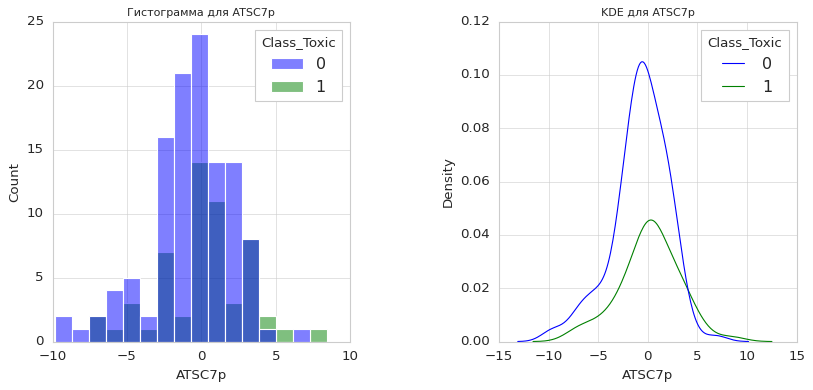

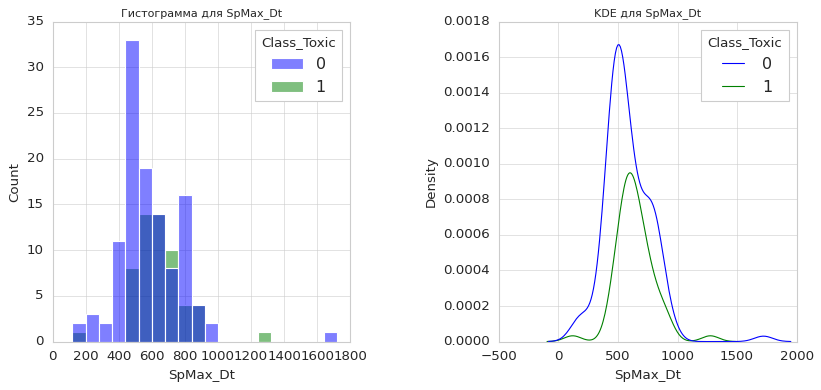

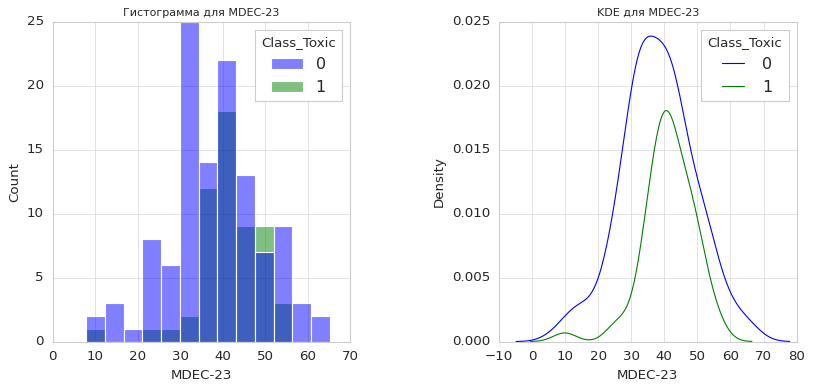

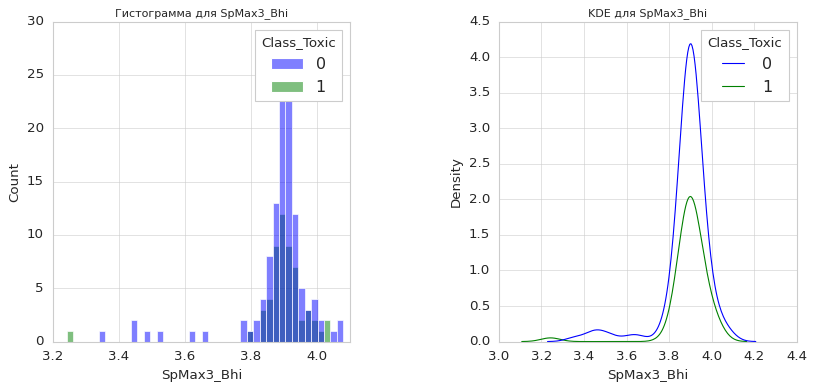

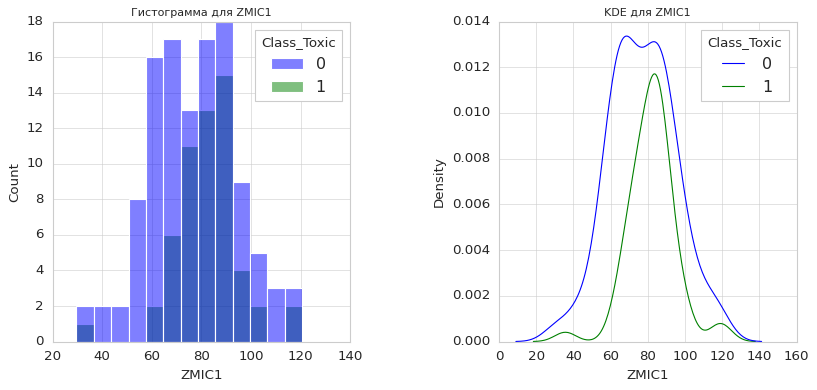

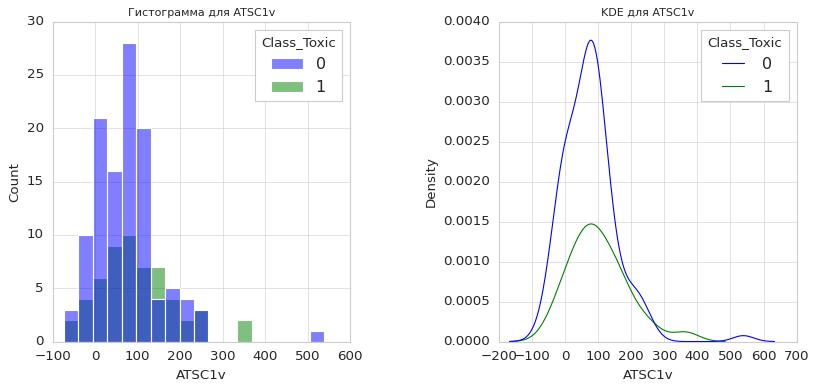

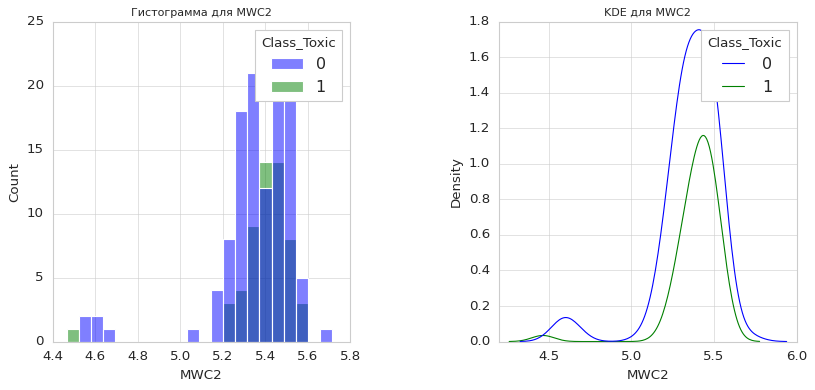

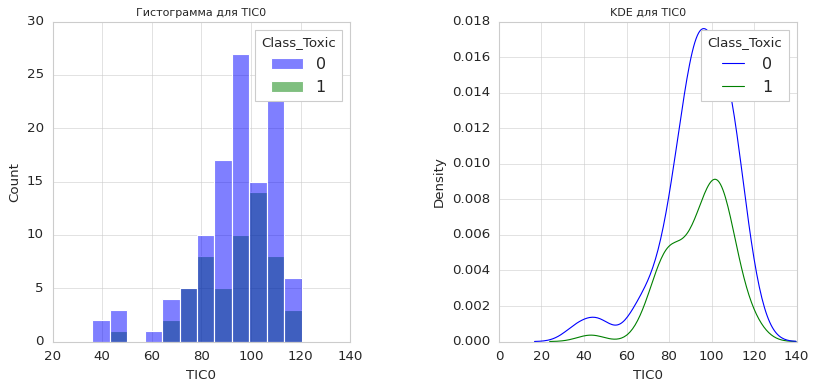

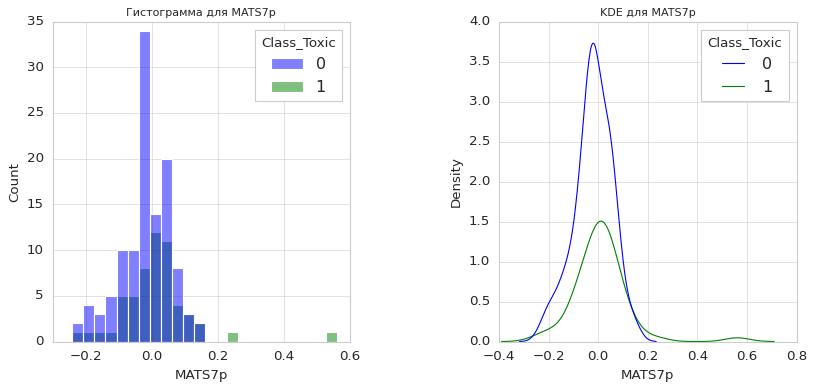

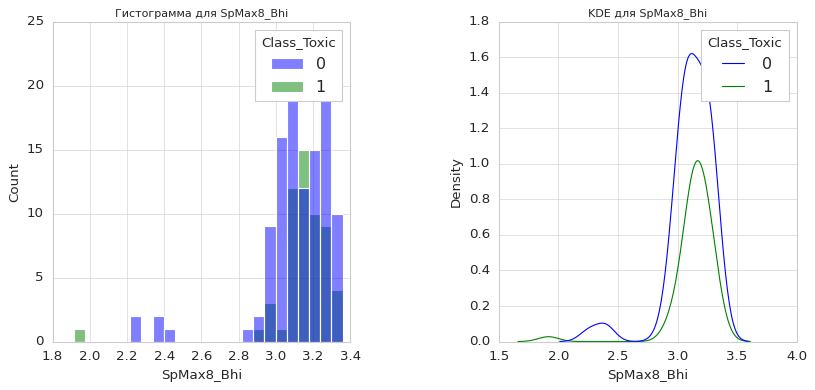

In [31]:
sns.set_style("whitegrid")

for feature in data.columns[:-1]:

    fig, axs = plt.subplots(1, 2, figsize = (12, 5))
    plt.subplots_adjust(wspace = 0.5)

    sns.histplot(data = data, x = feature, hue = 'Class_Toxic', alpha = 0.5, ax = axs[0])
    axs[0].set_title(f'Гистограмма для {feature}', fontsize = 10)
    axs[0].set_facecolor('white')
    axs[0].grid(True)

    sns.kdeplot(data = data, x = feature, hue = 'Class_Toxic', common_norm = True, ax = axs[1])
    axs[1].set_title(f'KDE для {feature}', fontsize = 10)
    axs[1].set_facecolor('white')
    axs[1].grid(True)

**Выводы:**

1) Во всех графиках виден дисбаланс между классами.

2) Из KDE видно, что распределения стремятся к нормальному.

3) Также видно, что для большинства признаков, максимумы распредения плотности совпадают.

Из гистограмм и KDE видно, что выбросы в даннных присутсвуют. Убедимся в этом, используя `box-plot`:

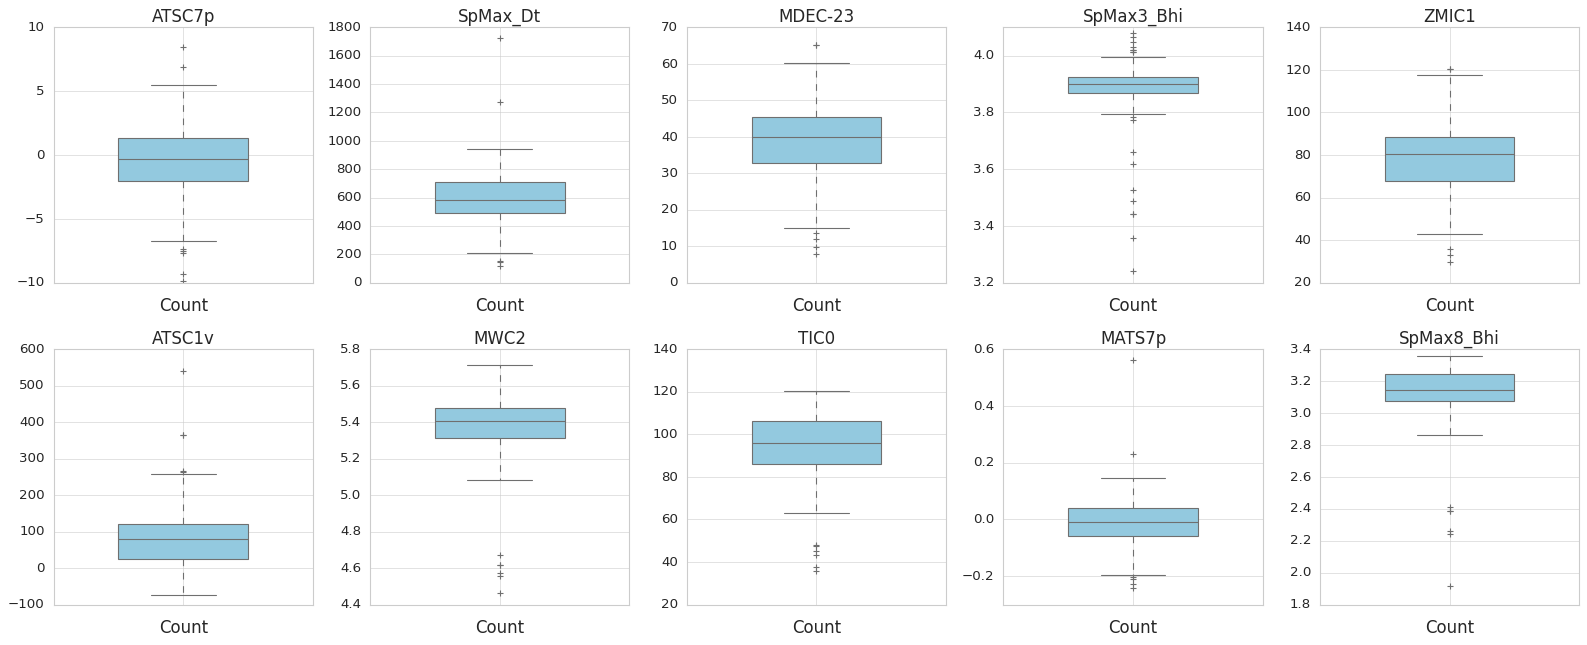

In [32]:
plt.figure(figsize = (20, 40))

num_rows = 10
num_cols = 5

for i, feature in enumerate(imp_feat, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data = data[feature], color = 'skyblue', width = 0.5)

    plt.title(f'{feature}', fontsize = 15)
    plt.xlabel('Count', fontsize = 15)
    plt.ylabel(None)

    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.grid(True)

plt.tight_layout()

**Выводы:** Теперь выбросы стали более наглядными.



## Предобработка данных

В этом разделе ожидается, что вы обработаете пропуски (если они есть) с помощью линейной регрессии, а выбросы (если они есть) обработайте способом на ваше усмотрение. Для оценки качества обработки пропусков используйте метрику MAPE.

Создадим массив признаков и массив таргета. Разобьем наши данные на обучающую и тестовую выборки в отношении 7:3:

In [33]:
X = df.drop('Class_Toxic', axis = 1)
y = df['Class_Toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(119, 1203) (119,) (52, 1203) (52,)


Для борьбы с выбросами применим стандартизацию данных:

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Давайте посмотрим на распределение наших данных по целевой переменной по всему датасету, тренировочной и тестовой выборках:

Text(0.5, 1.0, 'Распределение классов в test')

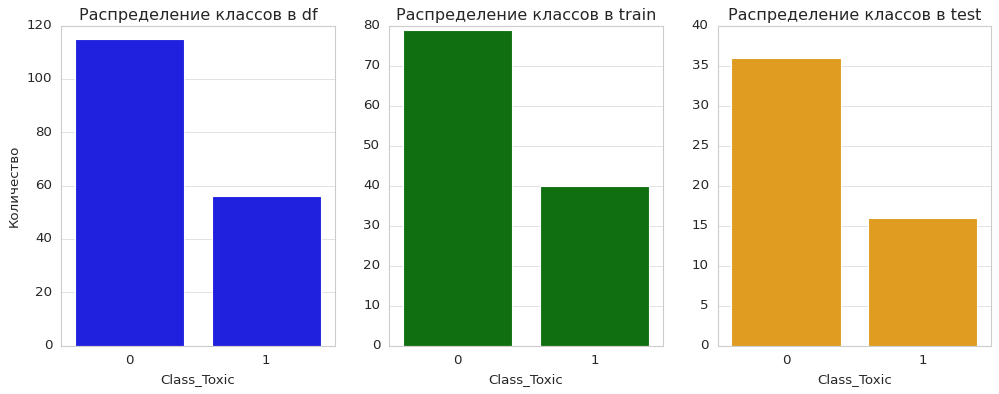

In [35]:
original = df['Class_Toxic'].value_counts()
train = y_train.value_counts()
test = y_test.value_counts()

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.barplot(x = original.index, y = original.values, ax = axes[0], palette = ['blue'])
axes[0].set_title('Распределение классов в df')
axes[0].set_ylabel('Количество')

sns.barplot(x = train.index, y = train.values, ax = axes[1], palette = ['green'])
axes[1].set_title('Распределение классов в train')

sns.barplot(x = test.index, y = test.values, ax = axes[2], palette = ['orange'])
axes[2].set_title('Распределение классов в test')

Теперь видно, что между классами сильный перекос.

## Обучение моделей

Для лучшей точности перед обучением каждой модели будем делать поиск по сетке. Также не будем забывать про дисбаланс классов. Все параметры для GreadSearchCV были взяты из документации sklearn.

### DecisionTreeClassifier

In [102]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'class_weight': ['balanced']
}

tree_classifier = DecisionTreeClassifier(random_state = 42)

# pos_label = 1 - учитывает дисбаланс классов при использовании F1-score
scorer = make_scorer(f1_score, pos_label = 1)
grid_search = GridSearchCV(estimator=tree_classifier, param_grid = param_grid, cv = 5, scoring = scorer)

grid_search.fit(X_train, y_train)

print('Наилучшие параметры:', grid_search.best_params_)
print(f'F1 с учетом сбалансированных классов: {grid_search.best_score_:.2f}')

Наилучшие параметры: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
F1 с учетом сбалансированных классов: 0.47


### RandomForestClassifier

In [103]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

forest_classifier = RandomForestClassifier(random_state = 42)

scorer = make_scorer(f1_score, pos_label = 1)
grid_search = GridSearchCV(estimator = forest_classifier, param_grid = param_grid, cv = 5, scoring = scorer)

grid_search.fit(X_train, y_train)

print('Наилучшие параметры:', grid_search.best_params_)
print(f'F1 с учетом сбалансированных классов: {grid_search.best_score_:.2f}')

Наилучшие параметры: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
F1 с учетом сбалансированных классов: 0.27


### LogisticRegression

In [108]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced']
}

logreg_classifier = LogisticRegression(random_state = 42, solver = 'liblinear')

scorer = make_scorer(f1_score, pos_label = 1)
grid_search = GridSearchCV(estimator = logreg_classifier, param_grid = param_grid, cv = 5, scoring = scorer)

grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)
print(f'F1 с учетом сбалансированных классов: {grid_search.best_score_:.2f}')

Наилучшие параметры: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
F1 с учетом сбалансированных классов: 0.37


### KNeighborsClassifier

In [109]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

knn_classifier = KNeighborsClassifier()

scorer = make_scorer(f1_score, pos_label = 1)
grid_search = GridSearchCV(estimator = knn_classifier, param_grid = param_grid, cv = 5, scoring = scorer)

grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)
print(f'F1 с учетом сбалансированных классов: {grid_search.best_score_:.2f}')

Наилучшие параметры: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
F1 с учетом сбалансированных классов: 0.40


### Нейронная сеть

В этом разделе предлагается самостоятельно создать и обучить нейронную сеть, про интересные структуры вы можете посмотреть на последней странице статьи.

Напишем функцию для отрисовки кривых обучения:

In [110]:
def plot_learning_curves(history):
    fig, axs = plt.subplots(1, 2, figsize = (20, 7), facecolor = 'white')

    axs[0].plot(history['loss_train'], label = 'train')
    axs[0].plot(history['loss_val'], label = 'test')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    axs[1].plot(history['metric_train'], label = 'train')
    axs[1].plot(history['metric_val'], label = 'test')
    axs[1].set_title('F1 Score')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('F1 Score')
    axs[1].legend()

    plt.show()

Зададим модель:

Epoch [100/100], Loss_train: 0.48, Loss_val: 0.63, Metric_train: 0.76, Metric_val: 0.64


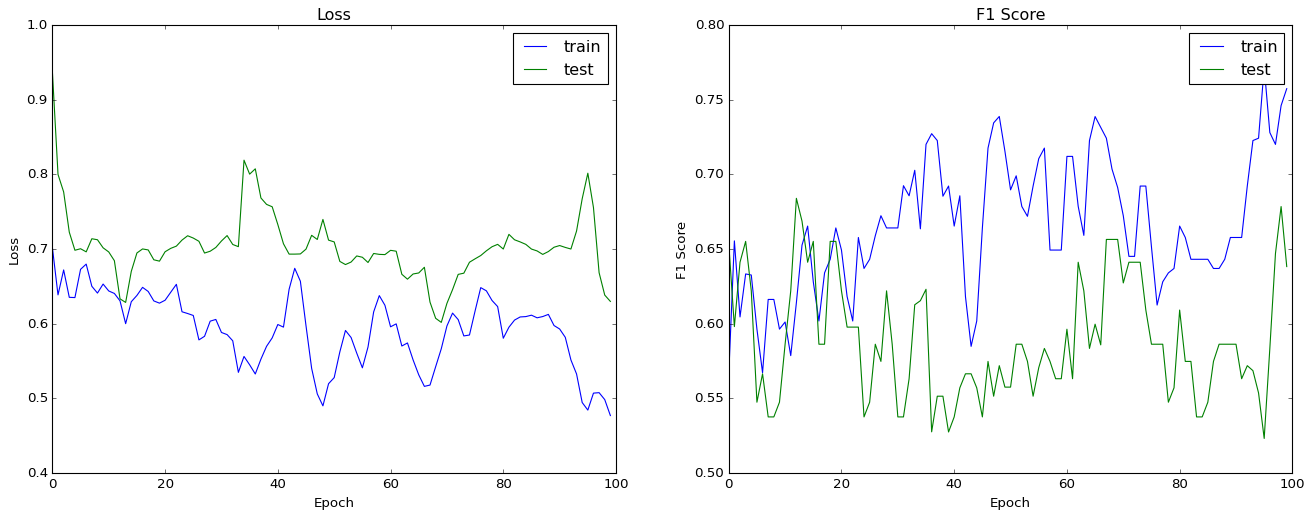

In [111]:
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        return x

class_weights = torch.FloatTensor([1, 10])
criterion = nn.CrossEntropyLoss(weight = class_weights)
model = Net(input_size = X_train.shape[1])

optimizer = optim.Adam(model.parameters(), lr = 0.01, weight_decay = 0.001)

num_epochs = 100
batch_size = 16
history = {'loss_train': [], 'loss_val': [], 'metric_train': [], 'metric_val': []}

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        X_batch = torch.FloatTensor(X_train[i:i+batch_size])
        y_batch = torch.LongTensor(y_train[i:i+batch_size].values)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        outputs_train = model(torch.FloatTensor(X_train))
        outputs_test = model(torch.FloatTensor(X_test))

        _, predicted_train = torch.max(outputs_train, 1)
        _, predicted_test = torch.max(outputs_test, 1)

        loss_train = criterion(outputs_train, torch.LongTensor(y_train.values))
        loss_test = criterion(outputs_test, torch.LongTensor(y_test.values))

        metric_train = f1_score(y_train, predicted_train, average = 'weighted')
        metric_test = f1_score(y_test, predicted_test, average = 'weighted')

        history['loss_train'].append(loss_train.item())
        history['loss_val'].append(loss_test.item())
        history['metric_train'].append(metric_train)
        history['metric_val'].append(metric_test)

        clear_output(wait = True)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss_train: {loss_train.item():.2f}, Loss_val: {loss_test.item():.2f}, Metric_train: {metric_train:.2f}, Metric_val: {metric_test:.2f}')

plot_learning_curves(history)

Тестирование:

In [112]:
with torch.no_grad():
    outputs = model(torch.FloatTensor(X_test))
    test_loss = criterion(outputs, torch.LongTensor(y_test.values))
    _, predicted_test = torch.max(outputs, 1)
    test_metric = f1_score(y_test, predicted_test, average = 'weighted')
    print(f"Test Loss: {test_loss.item():.2f}, F1-score: {test_metric:.2f}")

Test Loss: 0.63, F1-score: 0.64


## Анализ полученных результатов и выводы по задаче

### Предобработка данных

В процессе анализа данных мы обнаружили следующее:

1. В основном признаки имеют распределение, близкое к нормальному.

2. Присутствует значительное количество выбросов, которые были обработаны с использованием StandardScaler.

3. В данных наблюдается дисбаланс между классами.

### Обучение моделей

При анализе данных решающим деревом были выделены 10 наиболее влиятельных признаков для последующего обучения. Затем был выполнен поиск по сетке параметров для каждой модели с целью достижения наилучшей точности. Однако метрики моделей оказались недостаточно высокими. Попытка воспроизвести подход, использованный в статье, не принесла улучшений в результатах.

Далее мы решили провести обучение моделей на всем наборе данных, учитывая дисбаланс классов и подбирая параметры заранее. Следует отметить, что авторы статьи использовали Accuracy в качестве целевой метрики и достигли лучших результатов с помощью модели градиентного бустинга.

Метрики полученных моделей:

1. **Decision Tree:** 0.47
2. **Random Forest:** 0.27
3. **Logistic Regression:** 0.37
4. **K-Nearest Neighbors:** 0.40
5. **Multi-Layer Perceptron (MLP):** 0.64

### Общий вывод по задаче

Из полученных результатов видно, что наилучший показатель метрики F1 Score достигнут при использовании Multi-Layer Perceptron (MLP) модели. Таким образом, для данной задачи модель MLP является наилучшим выбором, обеспечивая наивысшую точность классификации молекул на токсичные и нетоксичные.

Конечно, полученные показатели далеки от идеала. Что могло привести к этому:

1. Неравномерное распределение классов существенно повлияло на результативность модели. Вероятно, я не учел этот дисбаланс должным образом при обучении.

2. Возможно, недостаточное количество данных не позволило моделям достаточно эффективно обучиться.

3. Также, вероятно, мне следовало провести более глубокий анализ данных перед обучением.

### Комментарий

Задача дейсвтительно классная, мне понравилось :) Только вот обидно, что в учебном курсе уделили всего лишь два семинара предобработке данных при дисбалансе классов. Возможно, из-за этого я не смог решить задачу так, как хотелось бы.